# The Optical Heisenberg Uncertainty Principle

## Objective
In the Heisenberg uncertainty relation, the momentum of a particle cannot be known with any greater accuracy than $h/\Delta x$ where $h$ is Planck's constant and $\Delta x$ is the uncertainty in spatial position. The more you localize its spatial position, the less certain you become about its momentum. An optical illustration for this is the diffraction of light though a narrow slit.

## The Details
A laser beam has very little spatial divergence. At 1 meter away its spot size is very nearly the same as 10 meters away. We say the transverse momentum is zero because of this. This is true under the condition that you have applied no localization of its spatial $x$ coordinate. You can localize it spatially, by passing the beam through a slit much smaller than the beam width and approaching the wavelength of the laser light. By doing this you become uncertain about your $x$-axis momentum, $p_x$ because each photon traveling along $y$ has passed through a region $\Delta x$, but we don't know exactly where in that region. The more you localize spatially by closing down the slit along the $x$-axis, the more uncertain becomes the $x$-axis momentum. This manifests itself in a broadening of the diffraction pattern in the $x$ direction which means that you've given the photons some momentum $p_x$ that was not there before (see Figure 1).
<img src="https://github.com/troymessina/ModernPhysics/blob/master/images/opticalanalogofup002.gif?raw=True" width="600" ><center><figcaption>Fig.1 - Laser diffraction through a slit. Figure from https://sciencedemonstrations.fas.harvard.edu/presentations/optical-analog-uncertainty-principle</figcaption></center>

## Procedure
Set up your experiment as shown in Figure 2. You will adjust the caliper spacing over five different values of $\Delta x$ and measure the full width of the laser spot, which we will call $\Delta p_x$ even though it is a distance and not a momentum.
<img src="https://github.com/troymessina/ModernPhysics/blob/master/images/Experimental_Setup.png?raw=True" width="700"><center><figcaption>Fig.2 - The experimental setup showing relevant variables.</figcaption></center>

You will need to measure $L, \Delta x$, and $\Delta p_x$ all in meters. From geometry, you can calculate $\theta$.

### Deliverables
1. $\Delta x$ is the full width of the calipers, but $\Delta p_x$ is half the width of the laser spot. Explain why this is true.
2. Show how to calculate $\theta$ from the geometry shown in Figure 2.

## Analysis
Now, we will use Jupyter to analyze your results. First we will do some standard imports. We won't use all of these imports, but I tend just always use this set as my default.

In [1]:
# import modules
import pandas as pd
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

## Data
Enter your data below for $L, \Delta x$, and $\Delta p_x$. Use a single variable for $L$. We will use numpy arrays for the set of five measurements. Make an array for $\Delta x$, and make a separate array for $\Delta p_x$ using meaningful array names. The syntax for these arrays is

``array_name = np.array([val1, val2, val3, val4, val5])``

In [9]:
L=19*12*0.0254 #distance from laser to wall converted from feet to meters

spotsize = np.array([0.0762, 0.0381, 0.0254, 0.01905, 0.015]) # full width of laser spot in meters
dx = np.array([1e-4, 2e-4, 3e-4, 4e-4, 5e-4])#width of calipers in meters

## Analysis
From the geometrical analysis, convert your array for $\Delta p_x$ into an array for $\theta$. You can call inverse trigonometric functions in numpy. For example, ``np.arcsin()`` is the inverse sine function. If this is applied to an array, the output is an equally sized array.

Second, make an array that is $\Delta x \Delta\theta$ by multiplying the appropriate arrays.

In [10]:
theta = np.arctan(spotsize/2/L)

Heisenberg = dx*theta*1e9 #convert the values to nm

### Plot your data
The commands to plot are shown below. You will need to use the appropriate $x$ and $y$ arrays based on your array names. You will also want to adjust the ``ylim`` appropriately.

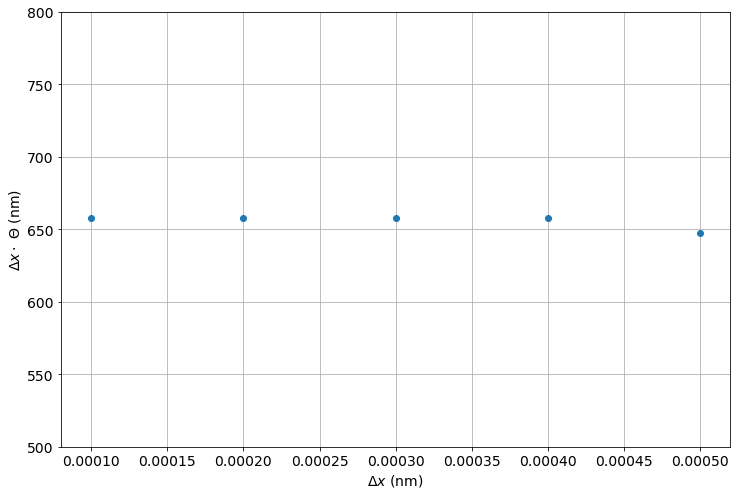

In [69]:
plt.plot(dx, Heisenberg, 'o')
plt.grid(True)
plt.xlabel('$\Delta x$ (nm)')
plt.ylabel('$\Delta x \cdot~\Theta $ (nm)')
plt.ylim(500, 800)
plt.show()

### Uncertainty
We need to add uncertainty. To do this, estimate the uncertainty in each measurement $L, \Delta x$, and $\Delta p_x$. Next, calculate the uncertainty in $\theta$. HINT: You may need to look up the derivative of an inverse trig function. Finally, calculate the uncertainty of the product $\Delta x \Delta \theta$.

### Deliverables
1. Explain your estimates for the measurement uncertainties.
2. Explain your process for propagating those uncertainties.

In [62]:
dL = 0.01
ddx = 5e-5
ddpx = 0.001

theta_unc = np.sqrt(((1/(1+(spotsize/2/L)**2)*ddpx)**2))# + ((1/(1+(spotsize/2/L)**2)*dL)**2))
Heisenberg_unc = Heisenberg*(theta_unc/theta+ddx/dx)#(np.sqrt((theta*5e-4)**2 + (dx*theta_unc)**2))*1e9
print(Heisenberg_unc, theta_unc, theta)

[428.93829458 364.47092687 409.64750429 482.23568589 564.75254418] [0.00099996 0.00099999 0.001      0.001      0.001     ] [0.00657885 0.00328946 0.00219298 0.00164474 0.00129507]


Put your errorbars on a plot like the previous plot.

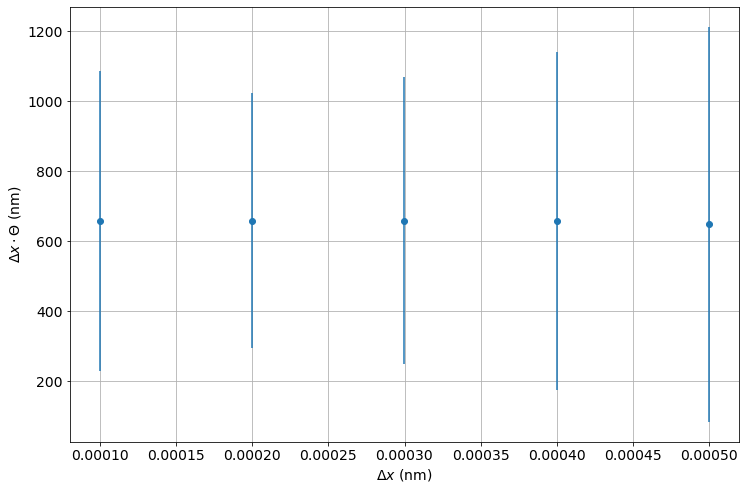

In [70]:
plt.errorbar(dx, Heisenberg, fmt='o', yerr=Heisenberg_unc)
plt.grid(True)
plt.xlabel('$\Delta x$ (nm)')
plt.ylabel('$\Delta x \cdot\Theta $ (nm)')
#plt.ylim(400, 900)
plt.show()

## Discussion
The error bars tend to be quite large even when making unreasonably small estimates. This is likely due to the non-linearity of the inverse tangent function, i.e., the first order assumption of error is still a large term in the Taylor Series.

You might notice that the product of $\Delta x \Delta \theta$ has a value near the wavelength of the laser. Why is this? Let's take a deeper look. We can define the momentum of the laser beam as

$$\vec{p}=p \sin{\theta} \hat{i} + p \cos{\theta} \hat{j}$$

Notice the trig functions are reversed from normal. Based on Figures 1 and 2, why is this?

$\theta\lesssim 1^o$ for our measurements. The $y$-component is$p_y = p \cos{\theta} \approx p$. The $x$-component is what we are interested in for this experiment. For the small angles in this experiment, it can be written

$$p_x = p \sin{\theta} \approx p\theta$$

From deBroglie's hypothesis, we know the momentum of a particle (massive or not) is $p = h/\lambda$. Therefore,

$$p_x = \frac{h}{\lambda}\theta$$

This component of the momentum is the uncertainty in the momentum since it should be zero in the realm where $\Delta x$ is large. This means we can write the Heisenberg Uncertainty as

$$\Delta x \Delta p = \Delta x \cdot p_x = \frac{h}{\lambda}\Delta x\cdot\theta$$

Since we know the Heisenberg Uncertainty is $\Delta x \Delta p \lesssim h$, we have

$$\Delta x \cdot\theta \approx \lambda$$

### Deliverable
Propose follow up experiments to test that $\Delta x \cdot \theta\approx \lambda$.